In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
from tqdm import tqdm_notebook,tnrange,tqdm_pandas,tqdm

import os
from dateutil import parser
import cPickle as pickle

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib import animation
from IPython.core.display import HTML
%matplotlib inline
import timeit


In [2]:
plt.rcParams['figure.figsize'] = (20,20)
#tqdm.pandas(tqdm())


In [3]:
## ONLY RUN IF DATA IS NOT CLEAN 
# with open('urinal-data-28-nov.csv','r') as raw, open('urinal-data-28-nov_clean.csv', 'a') as clean_f:
#     for line in raw:
#         if(len(line.split(',')) != 65):
#             print(len(line))
#         else:
#             clean_f.write(line)

In [4]:
pickle_name = "urinal-data-28-nov_clean.p"

#----------time convert function: assumes times are ok and ignores otherwise----------   
def convert_time(t):
    try:
        dt = parser.parse(t)
    except:
        pass
        
#---------- read in pick or read csv, cleanup, and create pickle----------   
if os.path.isfile(pickle_name):
    print("loading pickle")
    df = pd.read_pickle(pickle_name)
else:
    print("creating pickle...")
    print("this will take some time...")
    df = pd.read_csv("urinal-data-28-nov_clean.csv")
    df.columns= ["time"]+["P"+str(x) for x in range(64)]
    df.set_index('time')
    
    chunk = df.iloc[:]
    chunk = chunk[[(x[:2] != "TT") for x in chunk["time"]]]
    chunk = chunk[[x[16:18] != ":S" for x in chunk["time"]]]
    chunk.set_index('time')
    
    chunk.to_pickle(pickle_name)
#tqdm.pandas(tqdm())

loading pickle


In [5]:
#df["time"][461491] = 'Thu Nov 23 18:00:06 2017'
#df.["time"][2750993] = 'Sun Nov 26 18:00:10 2017'

# ORIGINAL RAW TIME STAMPS @ indexes above
# TThu Nov 23 18:00:06 2017"
# Sun Nov 26 18:00:Sun Nov 26 18:00:10 2017"

In [6]:
# from dateutil import parser
# def convert_time(t):
#     try:
#         dt = parser.parse(t)
#     except:
#         print(t)
    
# df["time"].apply(convert_time)

In [7]:
df

,time,P0,P1,P2,P3,P4,P5,P6,P7,P8,...,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63
0,Tue Nov 21 05:38:42 2017,23.50,24.75,26.00,24.25,23.25,23.50,22.00,24.00,25.00,...,21.50,23.25,22.50,22.00,23.00,22.50,22.25,22.75,22.00,23.50
1,Tue Nov 21 05:38:42 2017,24.25,24.75,24.75,23.75,24.75,23.75,23.00,23.00,26.25,...,22.25,22.75,22.50,22.00,22.75,23.50,22.25,23.50,22.00,21.75
2,Tue Nov 21 05:38:42 2017,25.50,26.25,24.00,23.50,23.50,24.25,23.25,21.50,26.50,...,22.25,23.00,22.25,23.25,23.00,23.75,23.00,23.25,23.25,24.25
3,Tue Nov 21 05:38:42 2017,24.50,26.00,24.00,23.75,23.75,23.50,22.25,22.75,25.50,...,22.75,22.75,23.00,22.50,24.00,23.00,22.75,22.50,21.50,22.00
4,Tue Nov 21 05:38:42 2017,24.25,26.25,22.75,23.50,23.50,24.25,22.50,22.25,26.50,...,22.50,23.50,23.00,23.00,22.00,24.00,22.25,23.50,22.00,23.75
5,Tue Nov 21 05:38:42 2017,24.50,25.00,23.25,23.25,23.75,23.50,22.50,22.75,25.75,...,21.50,22.75,22.25,22.75,23.25,22.50,22.25,22.00,23.00,22.50
6,Tue Nov 21 05:38:42 2017,26.25,24.75,23.50,24.25,24.00,24.50,23.00,22.00,25.50,...,21.50,22.75,22.25,21.50,22.50,23.50,21.50,22.25,22.50,22.25
7,Tue Nov 21 05:38:42 2017,24.50,24.25,23.75,23.25,24.50,24.25,23.50,22.00,24.50,...,22.75,24.25,24.25,22.75,22.50,23.50,22.50,22.25,22.00,21.50
8,Tue Nov 21 05:38:42 2017,25.25,24.25,22.25,23.25,23.75,23.75,22.00,22.25,23.75,...,22.25,22.25,23.50,23.00,23.25,22.75,22.50,22.75,22.50,22.50
9,Tue Nov 21 05:38:42 2017,25.25,23.75,24.00,23.75,24.00,23.75,23.25,23.00,24.50,...,22.25,23.00,21.75,21.00,22.25,23.25,22.75,21.50,22.50,22.25


# Get pandas dataframe as frames 
## (arrays)

In [ ]:
pickle_name2 = 'frames.p'

if os.path.isfile(pickle_name2):
    print("loading pickle")
    with open(pickle_name2, 'rb') as f:
        frames = pickle.load(f)
else:
    print("creating pickle...")
    print("this will take some time...")
    frames = []
    for row in df.iloc[:,1:].iterrows():
        frames.append(np.flip((np.array(row[1:]).reshape(8,8).astype('float').T),0))
    
    
    with open(pickle_name2, 'wb') as f:
        pickle.dump(frames, f)
    

loading pickle


In [ ]:
# frames = []
# for row in df.iloc[:,1:].iterrows():
#     frames.append(np.flip((np.array(row[1:]).reshape(8,8).astype('float').T),0))

In [12]:
# with open('frames.p', 'wb') as f:
#     pickle.dump(frames, f)
# len(frames)

# create a bitmask function

In [14]:
# a: x centre point of kernel
# a: x centre point of kernel
# r1: length of kernel
# r2: width of kernel
# n: dimension of array (assuming square matrix)
def bitmask_2d_square(a,b,n,r1,r2):
    # n = dimension matrix
    # m = dimension of kernel
    y,x = np.ogrid[-a:n-a, -b:n-b]
    #mask = x*x+y*y > r*r                               #CIRCLE
    #mask = (np.maximum(abs(x),abs(y)) < r1)             #SQUARE
    mask = abs((x/r1)+(y/r2)) + abs((x/r1)-(y/r2)) < 2  #RECTANGLE
    return mask

# Threshold each Urinal 
### Loads a pickled version of the chosen threshold if it exists
### Otherwise it creates it (takes ~25 mins)

In [15]:
# Which threshold do you want?

### MUST BE 4 CHARACTERS i.e. 24.0 NOT 24
threshold = 23.5 #temperature average considered to be a person
pickle_name1 = 'df_tempMeans_'+str(threshold)[0:2]+'_'+str(threshold)[3]+'.p'
pickle_name2 = 'df_tempMeans_thresh_'+str(threshold)[0:2]+'_'+str(threshold)[3]+'.p'


if os.path.isfile(pickle_name1) and os.path.isfile(pickle_name2):
    print("loading pickles")
    df_tempMeans = pd.read_pickle(pickle_name1)
    df_tempMeans_thresh = pd.read_pickle(pickle_name2)
else:
    print("creating pickle...")
    print("this will take some time...")
    # frames is a list of 2D arrays
    # t is the instantaneous time point
    # frames[t][0][0] is the top left pixel
    # frames[t][7][7] is the bottom right pixel
    # 31.75 is the maximum, 20.5 is the minimum temp
    #
    # u1   u2   u3
    #    |    |    |
    #    |    |    |
    #    |    |    |

    #----------VARIABLES----------
    u3 = 5 #centre of rectangle right
    u2 = 2 #centre of rectangle middle
    u1 = -1 #centre of rectangle left
    ux = [u1,u2,u3]
    kw = 3 #Kernel width
    kernel_area = 15 #Area of kernel = 15 pixels 
    
    n = 8 #
    temps_thresh = []
    temps = []
    # for all frames
    for t in tnrange(len(frames)-1):
        temp_thresh = [0,0,0]
        temp = [0,0,0]
        for centrex in range(3):
            mask = bitmask_2d_square(kw,ux[centrex],n,3,5)
            array = np.zeros((n, n))
            # create bitmask
            array[mask] = 1
            if centrex == 0:
                mean_temp = (np.multiply(frames[t],array).sum())/10
            else:
                mean_temp = (np.multiply(frames[t],array).sum())/kernel_area
            temp[centrex] = mean_temp
            if mean_temp > threshold:
                temp_thresh[centrex] = 1
            else:
                temp_thresh[centrex] = 0

        temps_thresh.append(temp_thresh)
        temps.append(temp)

    df_tempMeans = pd.DataFrame(temps)
    df_tempMeans_thresh = pd.DataFrame(temps_thresh)
    df_tempMeans.to_pickle(picklename1)
    df_tempMeans_thresh.to_pickle(picklename2)

loading pickles


# Differentiate Binary Threshold Columnwise

In [16]:
print("Differentiating df_tempMeans_thresh" )
df_temp_diff = df_tempMeans_thresh.diff()[1:]
print("complete")

Differentiating df_tempMeans_thresh
complete


# Collect In and Out Times (as indices)

In [17]:
# Check all that all who entered also left
#assert df_temp_diff.iloc[:,0].sum() == False # <-- FAILS
#assert df_temp_diff.iloc[:,1].sum() == False # <-- FAILS
assert df_temp_diff.iloc[:,2].sum() == False

picklename = 'index_states.p'

if os.path.isfile(picklename):
    print("loading pickles")
    index_states = pd.read_pickle(picklename)
else:
    print("creating pickle...")
    print("this will take some time...")
    # Variable initialisation    
    walk_in = 1
    walk_out = -1
    stay = 0

    left   = 0
    middle = 1
    right  = 2

    #keep track of last non-stay state and the index/time respectively
    left_state_out   = 0
    middle_state_out = 0
    right_state_out  = 0

    left_state_in   = 0
    middle_state_in = 0
    right_state_in  = 0



    states_left_in = []
    states_middle_in = []
    states_right_in = []
    
    states_left_out = []
    states_middle_out = []
    states_right_out = []


    for t in tnrange(len(df_temp_diff)):

        #test left
        if df_temp_diff.iloc[t,left] == stay:
            pass
        elif df_temp_diff.iloc[t,left] == walk_out:
            left_state_out = t
            states_left_in.append(left_state_in)
            states_left_out.append(left_state_out)

        elif df_temp_diff.iloc[t,left] == walk_in:
            left_state_in = t



        #test middle
        if df_temp_diff.iloc[t,middle] == stay:
            pass
        elif df_temp_diff.iloc[t,middle] == walk_out:
            middle_state_out = t
            states_middle_in.append(middle_state_in)
            states_middle_out.append(middle_state_out)
        elif df_temp_diff.iloc[t,middle] == walk_in:
            middle_state_in = t

        #test right
        if df_temp_diff.iloc[t,right] == stay:
            pass
        elif df_temp_diff.iloc[t,right] == walk_out:
            right_state_out = t
            states_right_in.append(right_state_in)
            states_right_out.append(right_state_out)
        elif df_temp_diff.iloc[t,right] == walk_in:
            right_state_in = t


    states_left_in_df   = pd.DataFrame({'left_in': states_left_in})
    states_left_out_df   = pd.DataFrame({'left_out': states_left_out})      

    states_middle_in_df = pd.DataFrame({'middle_state_in': states_middle_in})
    states_middle_out_df = pd.DataFrame({'middle_state_out': states_middle_out})

    states_right_in_df  = pd.DataFrame({'right_state_in': states_right_in})                                    
    states_right_out_df  = pd.DataFrame({'right_state_out': states_right_out})


    index_states = pd.concat([states_left_in_df,states_left_out_df,states_middle_in_df,states_middle_out_df,states_right_in_df,states_right_out_df]
                             , ignore_index=True, axis=1)
    
    index_states.columns = ['left_in','left_out','middle_in','middle_out','right_in','right_out']
    
    index_states.to_pickle(picklename)

loading pickles


In [18]:
index_states.columns = ['left_in','left_out','middle_in','middle_out','right_in','right_out']

In [19]:
index_states

,left_in,left_out,middle_in,middle_out,right_in,right_out
0,0.0,7.0,0,4,38.0,39.0
1,8.0,9.0,6,8,41.0,767.0
2,10.0,11.0,10,11,768.0,780.0
3,13.0,14.0,12,13,781.0,1091.0
4,15.0,22.0,15,16,1092.0,1111.0
5,26.0,36.0,17,18,1112.0,1113.0
6,37.0,39.0,19,22,1115.0,1116.0
7,40.0,41.0,25,28,1119.0,1120.0
8,42.0,43.0,30,69,1121.0,1122.0
9,47.0,49.0,70,72,1123.0,1125.0


# Add Time Length Columns

In [20]:
# index_states["left_length"] = index_states["left_out"]- index_states["left_in"]
# index_states["middle_length"] = index_states["middle_out"]- index_states["middle_in"]
# index_states["right_length"] = index_states["right_out"]- index_states["right_in"]

In [21]:
left_df = pd.DataFrame({'left_in': index_states["left_in"] ,'left_out': index_states["left_out"] ,
                        'left_length': index_states["left_out"]- index_states["left_in"]})

middle_df = pd.DataFrame({'middle_in': index_states["middle_in"] ,'middle_out': index_states["middle_out"] ,
                        'middle_length': index_states["middle_out"]- index_states["middle_in"]})

right_df = pd.DataFrame({'right_in': index_states["right_in"] ,'right_out': index_states["right_out"] ,
                        'right_length': index_states["right_out"]- index_states["right_in"]})

# Remove Non-Stays

In [22]:
stay_length = 100 # 10 = 1 second
left_stays = left_df[left_df['left_length']>stay_length]
middle_stays = middle_df[middle_df['middle_length']>stay_length]
right_stays = right_df[right_df['right_length']>stay_length]

num_stays10 = [len(left_stays), len(middle_stays), len(right_stays)]
print("left: {} middle: {} right: {} ".format(num_stays10[0],num_stays10[1],num_stays10[2]))

stay_length = 200 # 10 = 1 second
left_stays = left_df[left_df['left_length']>stay_length]
middle_stays = middle_df[middle_df['middle_length']>stay_length]
right_stays = right_df[right_df['right_length']>stay_length]

num_stays20 = [len(left_stays), len(middle_stays), len(right_stays)]
print("left: {} middle: {} right: {} ".format(num_stays20[0],num_stays20[1],num_stays20[2]))

stay_length = 300 # 10 = 1 second
left_stays = left_df[left_df['left_length']>stay_length]
middle_stays = middle_df[middle_df['middle_length']>stay_length]
right_stays = right_df[right_df['right_length']>stay_length]

num_stays30 = [len(left_stays), len(middle_stays), len(right_stays)]
print("left: {} middle: {} right: {} ".format(num_stays30[0],num_stays30[1],num_stays30[2]))

stay_length = 400 # 10 = 1 second
left_stays = left_df[left_df['left_length']>stay_length]
middle_stays = middle_df[middle_df['middle_length']>stay_length]
right_stays = right_df[right_df['right_length']>stay_length]

num_stays40 = [len(left_stays), len(middle_stays), len(right_stays)]
print("left: {} middle: {} right: {} ".format(num_stays40[0],num_stays40[1],num_stays40[2]))

left: 218 middle: 57 right: 182 
left: 155 middle: 44 right: 106 
left: 77 middle: 21 right: 52 
left: 35 middle: 10 right: 19 


[Text(0,0,u'Left'), Text(0,0,u'Middle'), Text(0,0,u'Right')]

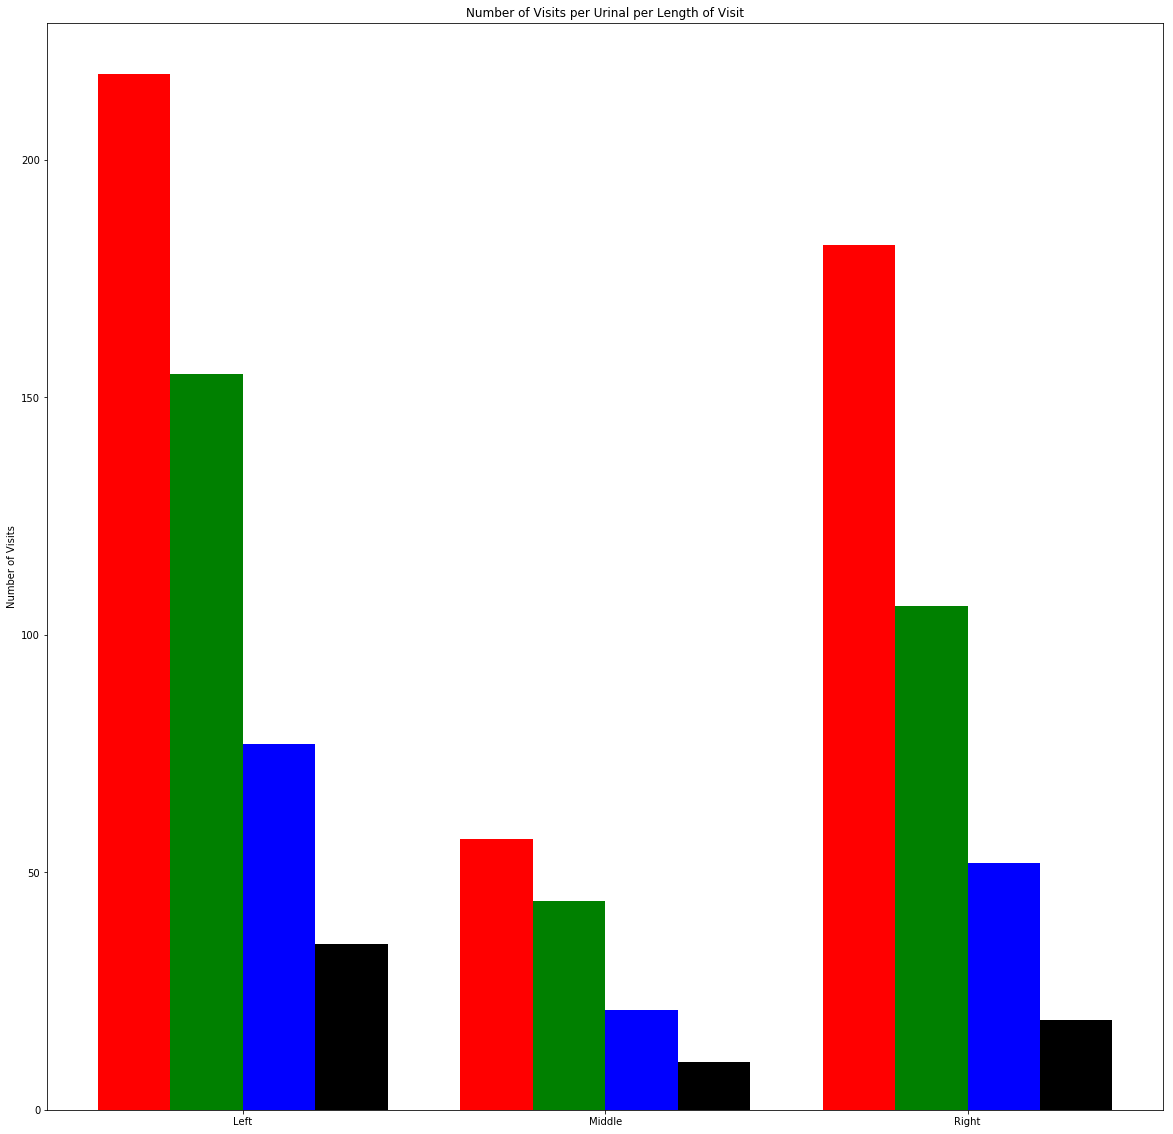

In [23]:
N = 3
ind = np.arange(N)
width = 0.2
fig, ax = plt.subplots()
stay10 = ax.bar(ind, num_stays10, width, color='r')
stay20 = ax.bar(ind+width, num_stays20, width, color='g')
stay30 = ax.bar(ind+2*width, num_stays30, width, color='b')
stay40 = ax.bar(ind+3*width, num_stays40, width, color='k')

ax.set_ylabel('Number of Visits')
ax.set_title('Number of Visits per Urinal per Length of Visit')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('Left', 'Middle', 'Right'))

In [24]:
stay_length = 100 # 10 = 1 second
left_stays = left_df[left_df['left_length']>stay_length]
middle_stays = middle_df[middle_df['middle_length']>stay_length]
right_stays = right_df[right_df['right_length']>stay_length]

# num_stays10 = [len(left_stays), len(middle_stays), len(right_stays)]
# print("left: {} middle: {} right: {} ".format(num_stays10[0],num_stays10[1],num_stays10[2]))
left_stay_mean = left_stays['left_length'].mean()
left_stay_std = left_stays['left_length'].std()
left_stay_norm = (left_stays['left_length'] - left_stay_mean)/left_stay_std

middle_stay_mean = middle_stays['middle_length'].mean()
middle_stay_std = middle_stays['middle_length'].std()
middle_stay_norm = (middle_stays['middle_length'] - middle_stay_mean)/middle_stay_std

right_stay_mean = right_stays['right_length'].mean()
right_stay_std = right_stays['right_length'].std()
# right_stay_med = right_stays['right_length'].median()
right_stay_norm = (right_stays['right_length'] - right_stay_mean)/right_stay_std


print("left   - mean: {} std: {}\nmiddle - mean: {} std: {}\nright  - mean: {} std: {}\n ".format(left_stay_mean, left_stay_std, middle_stay_mean, middle_stay_std, right_stay_mean, right_stay_std))


left   - mean: 280.532110092 std: 129.33068171
middle - mean: 296.105263158 std: 143.066877994
right  - mean: 252.203296703 std: 119.602506441
 


# Histograms of Urinal Visit Length 

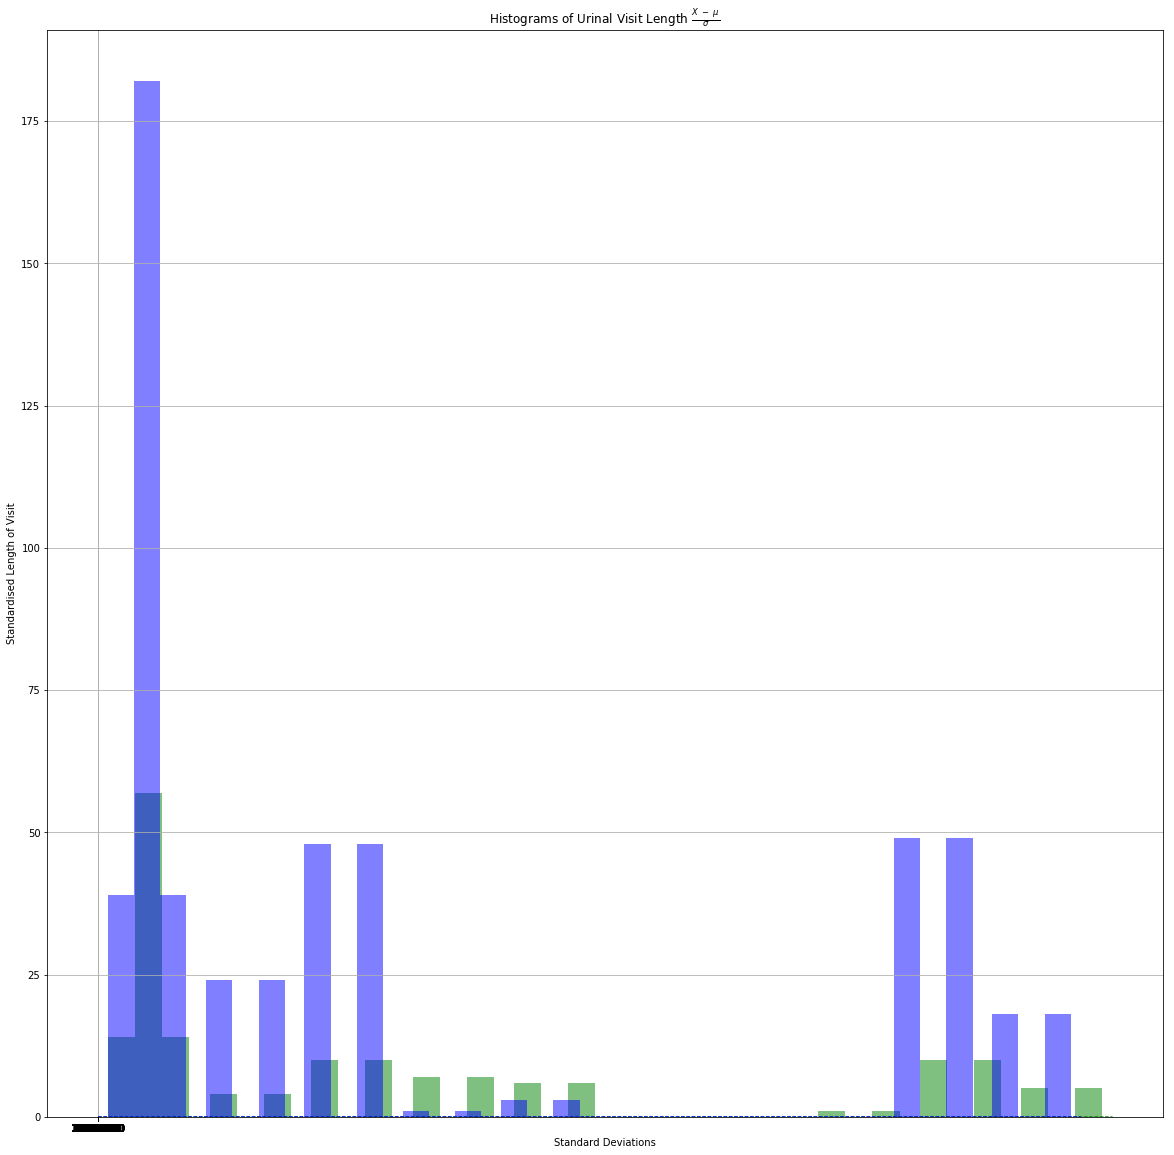

In [25]:
import matplotlib.mlab as mlab
# the histogram of the data
transp = 0.5
bins = 10
n, binsl, patches = plt.hist(left_stays, bins, facecolor='red', alpha=transp)
yl = mlab.normpdf( binsl, left_stay_mean, left_stay_std)
l = plt.plot(binsl, yl, 'r--', linewidth=1)

n, binsm, patches = plt.hist(middle_stays, bins,facecolor='green', alpha=transp)
ym = mlab.normpdf( binsm, middle_stay_mean, middle_stay_std)
l = plt.plot(binsm, ym, 'g--', linewidth=1)

n, binsr, patches = plt.hist(right_stays, bins, facecolor='blue', alpha=transp)
yr = mlab.normpdf( binsr, right_stay_mean, right_stay_std)
l = plt.plot(binsr, yr, 'b--', linewidth=1)

plt.xlabel('Standard Deviations')
plt.ylabel('Standardised Length of Visit')
plt.title(r'$\mathrm{Histograms\ of\ Urinal\ Visit\ Length}\ \frac{X\ - \ \mu}{\sigma}$ ')
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.legend()

# Standardised Histograms of Urinal Visit Length $\frac{X\ - \ \mu}{\sigma}$ 

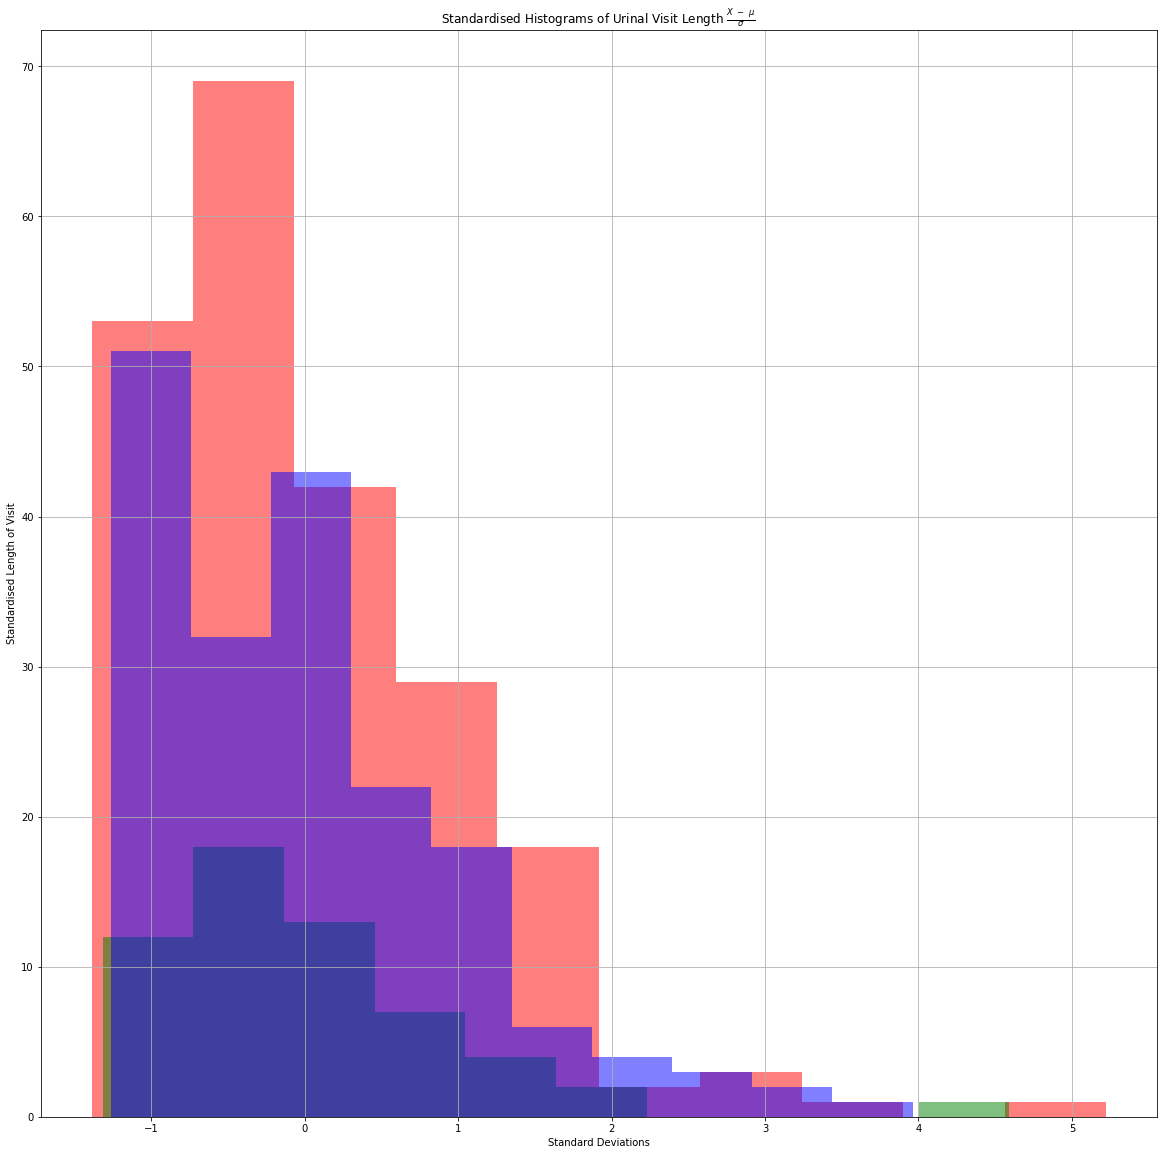

In [26]:
import matplotlib.mlab as mlab
# the histogram of the data
transp = 0.5
bins = 10
n, binsl, patches = plt.hist(left_stay_norm, bins, facecolor='red', alpha=transp)
yl = mlab.normpdf( binsl, left_stay_mean, left_stay_std)
l = plt.plot(binsl, yl, 'r--', linewidth=1)

n, binsm, patches = plt.hist(middle_stay_norm, bins,facecolor='green', alpha=transp)
ym = mlab.normpdf( binsm, middle_stay_mean, middle_stay_std)
l = plt.plot(binsm, ym, 'g--', linewidth=1)

n, binsr, patches = plt.hist(right_stay_norm, bins, facecolor='blue', alpha=transp)
yr = mlab.normpdf( binsr, right_stay_mean, right_stay_std)
l = plt.plot(binsr, yr, 'b--', linewidth=1)

plt.xlabel('Standard Deviations')
plt.ylabel('Standardised Length of Visit')
plt.title(r'$\mathrm{Standardised\ Histograms\ of\ Urinal\ Visit\ Length}\ \frac{X\ - \ \mu}{\sigma}$ ')
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.legend()

# add a 'best fit' line
# N = 3
# ind = np.arange(N)
# width = 0.2
# fig, ax = plt.subplots()
# stay10 = ax.bar(ind, num_stays10, width, color='r')

In [27]:
left_stay_norm.median()
middle_stay_norm.median()
right_stay_norm.median()
print("left   - meadian {}\nmiddle - median: {}\nright  - median: {}\n ".format(
    left_stay_norm.median(), middle_stay_norm.median(),right_stay_norm.median()))

left   - meadian -0.178086976635
middle - median: -0.133540784742
right  - median: -0.122934687079
 


# Sort Data by index Into a 3 colum Dataframe: Ins&Outs, Position, and Index

In [28]:

print("left")
left_ins = pd.DataFrame({"Sort_Data":left_stays["left_in"],"In_Out":["in" for x in range(len(left_stays))],
                              "Position":["Left" for x in range(len(left_stays))]})

left_outs = pd.DataFrame({"Sort_Data":left_stays["left_out"],"In_Out":["out" for x in range(len(left_stays))],
                              "Position":["Left" for x in range(len(left_stays))]})


print("middle")
middle_ins = pd.DataFrame({"Sort_Data":middle_stays["middle_in"],"In_Out":["in" for x in range(len(middle_stays))],
                              "Position":["middle" for x in range(len(middle_stays))]})
                           
middle_outs = pd.DataFrame({"Sort_Data":middle_stays["middle_out"],"In_Out":["out" for x in range(len(middle_stays))],
                              "Position":["middle" for x in range(len(middle_stays))]})

print("right")                           
right_ins = pd.DataFrame({"Sort_Data":right_stays["right_in"],"In_Out":["in" for x in range(len(right_stays))],
                              "Position":["right" for x in range(len(right_stays))]})                            
                            
right_outs = pd.DataFrame({"Sort_Data":right_stays["right_out"],"In_Out":["out" for x in range(len(right_stays))],
                              "Position":["right" for x in range(len(right_stays))]})

# to_sort = to_sort.append(middle_ins)
# to_sort = to_sort.append(middle_outs)
# to_sort = to_sort.append(right_ins)
# to_sort = to_sort.append(right_outs)



# to_sort = pd.concat([left_ins,left_outs],axis=0)
# left_outs
# to_sort.sort_values()
# type(to_sort)

left
middle
right


In [29]:

sorted_visits = left_ins
sorted_visits = sorted_visits.append(left_outs)

sorted_visits = sorted_visits.append(middle_ins)
sorted_visits = sorted_visits.append(middle_outs)
sorted_visits = sorted_visits.append(right_ins)
sorted_visits = sorted_visits.append(right_outs)
sorted_visits = sorted_visits.sort_values(by=['Sort_Data'])

In [30]:
sorted_visits

,In_Out,Position,Sort_Data
1,in,right,41.0
33,in,Left,164.0
19,in,middle,167.0
1,out,right,767.0
3,in,right,781.0
3,out,right,1091.0
33,out,Left,1120.0
19,out,middle,1120.0
52,in,Left,1398.0
52,out,Left,1505.0


In [41]:
# ASSUME ONLY ONE PERSON CAN COME IN AT A TIME
# state_changes = {"000100"}

#----- empty to 1 person changes---

states_dec = [
int('100000',2),
int('010000',2),
int('001000',2),
int('000100',2),
int('000010',2),
int('000001',2),

#----- 1 person to 2 changes---
int('100110',2),
int('100101',2),
int('110100',2),
int('101100',2),

int('010110',2),
int('010011',2),
int('110010',2),
int('011010',2),

int('001011',2),
int('001101',2),
int('011001',2),
int('101001',2),

#----- 2 person to 3 changes---
int('011111',2),
int('101111',2),
int('110111',2),
int('111011',2),
int('111101',2),
int('111110',2)]

states_bin = [bin(states_dec[i])[2:].zfill(6) for i in range(len(states_dec))]
# states_dec[3]
states_bin

In [113]:
states_dec.sort()
int(states_bin[2],2) | int(states_bin[1],2)
# states_bin[1]
# states_bin[3]

6

In [164]:
state_changes_df = pd.DataFrame({"Count":np.zeros(len(states_bin)),"State Change":states_bin})
state_changes_df = state_changes_df.set_index("State Change")

curr_state = "000"
prev_state = "000"
state_change = None
for row in sorted_visits.iterrows():
    
    # Deteremine the current state
    pos =row[1][1]
    inout = row[1][0]
    
    #LIN
    if pos == "Left" and inout=="in":
        curr_state = int(prev_state,2) | int("100",2)
    # LOUT
    if pos == "Left" and inout == "out":
        curr_state = int(prev_state,2) & int("011",2)
    # MIN
    if pos == "middle" and inout =="in":
        curr_state = int(prev_state,2) | int("010",2)
    # MOUT
    if pos == "middle" and inout == "out":
        curr_state = int(prev_state,2) & int("101",2)
    # RIN
    if pos == "right" and inout =="in":
        curr_state = int(prev_state,2) | int("001",2)
    # ROUT
    if pos == "right" and inout == "out":
        curr_state = int(prev_state,2) & int("110",2) 
    
    # Get State Change
    state_change = prev_state + bin(curr_state)[2:].zfill(3)
    state_changes_df.loc[state_change] = state_changes_df.loc[state_change]+1
    prev_state = bin(curr_state)[2:].zfill(3)


In [176]:
total = state_changes_df["Count"].sum()
global_prob = state_changes_df/total
state_changes_df.sort_values(by=["Count"])

,Count
State Change,
111011,0.0
011010,0.0
111101,0.0
001011,1.0
101111,1.0
100110,1.0
011111,2.0
110111,2.0
110100,2.0


# No-one to one person

[Text(0,0,u'Left'), Text(0,0,u'Middle'), Text(0,0,u'Right')]

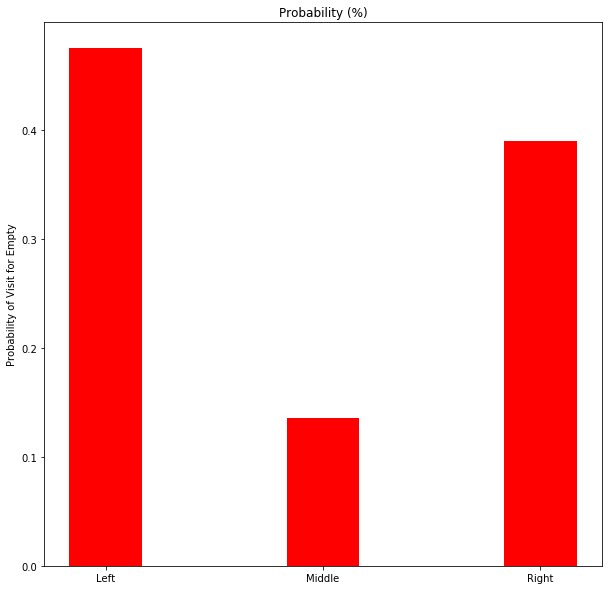

In [243]:
plt.rcParams['figure.figsize'] = (10,10)
tri_states = ["000","100","010","001","110","011","101","111"]
zero2one = []
for i in range(1,4):
    zero2one.append(state_changes_df.loc[tri_states[0]+tri_states[i]][0])
    
zero2one = zero2one/sum(zero2one)
# zero2one

N = 3.0
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
zero2one = ax.bar(ind, zero2one, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')
ax.set_xticks(ind)
ax.set_xticklabels(('Left', 'Middle', 'Right'))

# rects = ax.patches

# # Now make some labels
# labels = [zero2one[i] % i for i in xrange(len(rects))]

# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height , label, ha='center', va='bottom')
# zero2one[0]

[Text(0,0,u'Left'), Text(0,0,u'Middle'), Text(0,0,u'Right')]

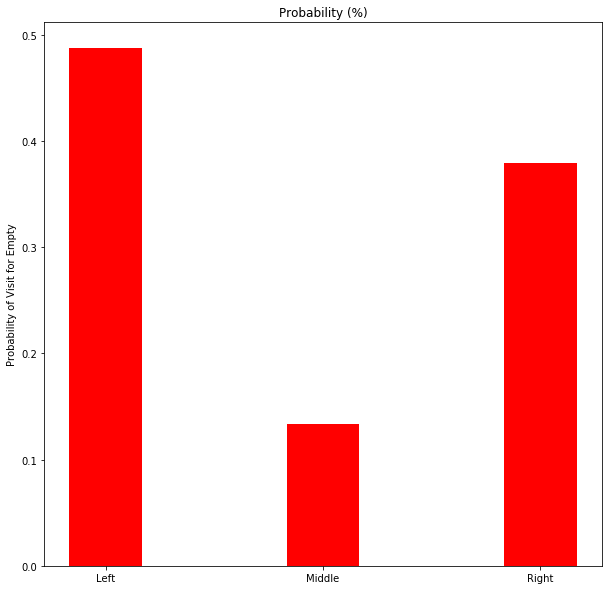

In [244]:

one2zero = []
for i in range(1,4):
    one2zero.append(state_changes_df.loc[tri_states[i]+tri_states[0]][0])

one2zero = one2zero/sum(one2zero)
one2zero

N = 3.0
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, one2zero, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')
ax.set_xticks(ind)
ax.set_xticklabels(('Left', 'Middle', 'Right'))

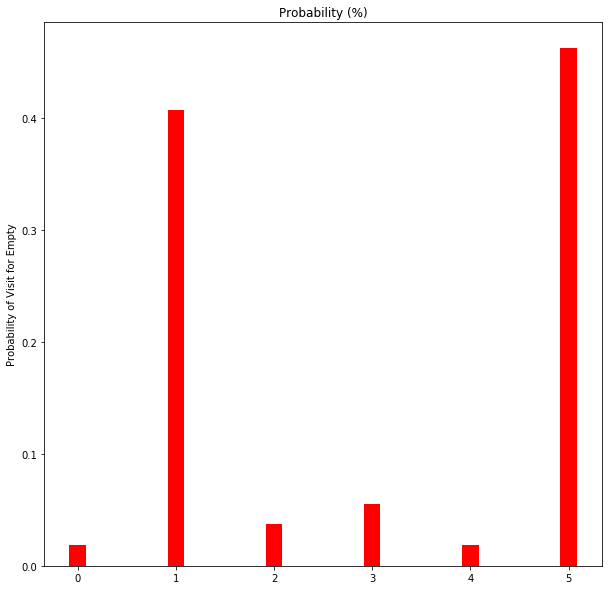

In [250]:

one2two = []
for i in range(1,4):
    for j in range(4,7):
        try:
            one2two.append(state_changes_df.loc[tri_states[i]+tri_states[j]][0])
        except:
            pass
        
one2two = one2two/sum(one2two)
one2two 

N = float(len(one2two))
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, one2two, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')
ax.set_xticks(ind)
# ax.set_xticklabels(('Left', 'Middle', 'Right'))

Text(0.5,1,u'Probability (%)')

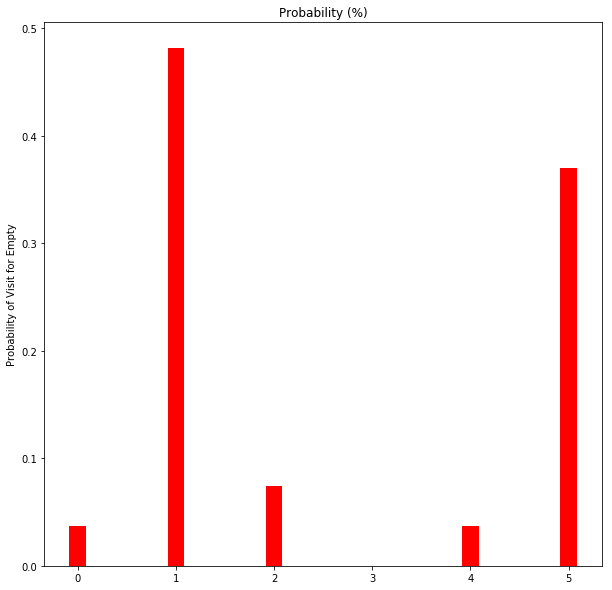

In [251]:

two2one = []
for i in range(1,4):
    for j in range(4,7):
        try:
            two2one.append(state_changes_df.loc[tri_states[j]+tri_states[i]][0])
        except:
            pass
two2one = two2one/sum(two2one)
two2one

N = float(len(two2one))
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, two2one, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')

Text(0.5,1,u'Probability (%)')

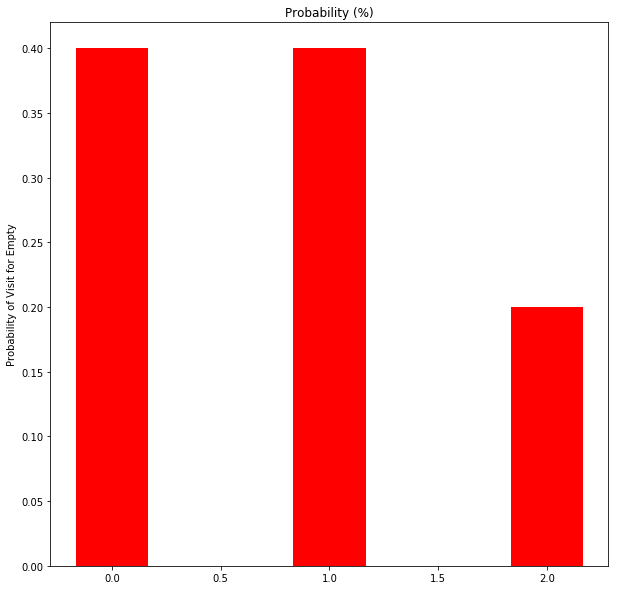

In [252]:

two2three = []
for i in range(4,7):
    two2three.append(state_changes_df.loc[tri_states[i]+tri_states[7]][0])
        
two2three = two2three/sum(two2three)
two2three

N = float(len(two2three))
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, two2three, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')

Text(0.5,1,u'Probability (%)')

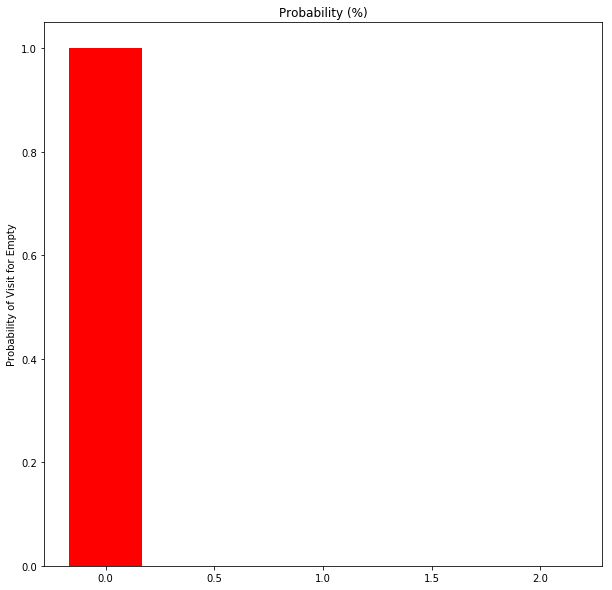

In [258]:

three2two = []
for i in range(4,7):
    three2two.append(state_changes_df.loc[tri_states[7]+tri_states[i]][0])
        
three2two = three2two/sum(three2two)
three2two

N = float(len(three2two))
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, three2two, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')

# ax.set_xticklabels(('Left', 'Middle', 'Right'))

# get mean median and sum of each pixel

In [19]:
import timeit
start_time = timeit.default_timer()
sum1 = []
mean1 = []
median1 = []
norm = 3652340
for i in tnrange(1,65):
    sum1.append(df.iloc[:,i].sum())
    mean1.append(df.iloc[:,i].mean())
    median1.append(df.iloc[:,i].median())
    
elapsed = timeit.default_timer() - start_time
print(elapsed) 


27.4109370708


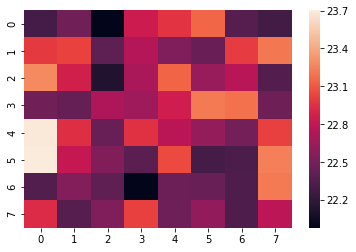

In [20]:
norm = len(df.iloc[:,2])

sum1_norm = [sum1[i]/norm for i in range(len(sum1))]
sum1_norm1 = [sum1[i]/1000000 for i in range(len(sum1))]

sum_df = pd.DataFrame({'col':sum1_norm})
sum_df = sum_df.values.reshape(8,8).astype('float')
sns.heatmap(sum_df)#, vmin=22, vmax=27)

# Zero Mean each pixel

In [21]:
centred = []
df_mean = pd.DataFrame()
for i in tnrange(1,65):
    centred = df.iloc[:,i] - mean1[i-1]
    df_mean = df_mean.append(pd.Series(centred),ignore_index=True)




KeyboardInterrupt: 

In [8]:
df_mean = df_mean.T

In [9]:
df_mean

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1.207543,2.277636,4.021988,1.406099,0.282712,0.355911,-0.366314,1.71566,2.007479,3.727404,...,-0.831686,0.028815,-0.427811,-0.365151,0.469363,-0.517959,-0.215613,0.143304,-0.332883,0.72127
1,1.957543,2.277636,2.771988,0.906099,1.782712,0.605911,0.633686,0.71566,3.257479,3.227404,...,-0.081686,-0.471185,-0.427811,-0.365151,0.219363,0.482041,-0.215613,0.893304,-0.332883,-1.02873
2,3.207543,3.777636,2.021988,0.656099,0.532712,1.105911,0.883686,-0.78434,3.507479,2.727404,...,-0.081686,-0.221185,-0.677811,0.884849,0.469363,0.732041,0.534387,0.643304,0.917117,1.47127
3,2.207543,3.527636,2.021988,0.906099,0.782712,0.355911,-0.116314,0.46566,2.507479,2.477404,...,0.418314,-0.471185,0.072189,0.134849,1.469363,-0.017959,0.284387,-0.106696,-0.832883,-0.77873
4,1.957543,3.777636,0.771988,0.656099,0.532712,1.105911,0.133686,-0.03434,3.507479,1.977404,...,0.168314,0.278815,0.072189,0.634849,-0.530637,0.982041,-0.215613,0.893304,-0.332883,0.97127
5,2.207543,2.527636,1.271988,0.406099,0.782712,0.355911,0.133686,0.46566,2.757479,0.227404,...,-0.831686,-0.471185,-0.677811,0.384849,0.719363,-0.517959,-0.215613,-0.606696,0.667117,-0.27873
6,3.957543,2.277636,1.521988,1.406099,1.032712,1.355911,0.633686,-0.28434,2.507479,0.977404,...,-0.831686,-0.471185,-0.677811,-0.865151,-0.030637,0.482041,-0.965613,-0.356696,0.167117,-0.52873
7,2.207543,1.777636,1.771988,0.406099,1.532712,1.105911,1.133686,-0.28434,1.507479,1.727404,...,0.418314,1.028815,1.322189,0.384849,-0.030637,0.482041,0.034387,-0.356696,-0.332883,-1.27873
8,2.957543,1.777636,0.271988,0.406099,0.782712,0.605911,-0.366314,-0.03434,0.757479,0.477404,...,-0.081686,-0.971185,0.572189,0.634849,0.719363,-0.267959,0.034387,0.143304,0.167117,-0.27873
9,2.957543,1.277636,2.021988,0.906099,1.032712,0.605911,0.883686,0.71566,1.507479,0.227404,...,-0.081686,-0.221185,-1.177811,-1.365151,-0.280637,0.232041,0.284387,-1.106696,0.167117,-0.52873


In [27]:
cMean = []
for i in tnrange(64):
    cMean.append(df_mean.iloc[:,i].mean())
    
# for i in tnrange(1,65):
#     sum1.append(df.iloc[:,i].sum())
#     mean1.append(df.iloc[:,i].mean())
# df_mean.iloc[:,10].mean()

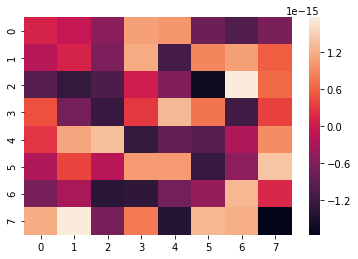

In [29]:
cMean_df = pd.DataFrame({'col':cMean})
cMean_df = cMean_df.values.reshape(8,8).astype('float')
sns.heatmap(cMean_df)#, vmin=22, vmax=27)

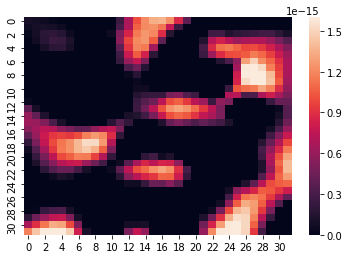

In [39]:
from scipy.interpolate import griddata
import math


points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:32j, 0:7:32j]
pixels = cMean
bicubic = griddata(points, pixels, (grid_x, grid_y), method='cubic')
sns.heatmap(bicubic, linewidths=0.0, vmin=0, vmax=1.6e-15)

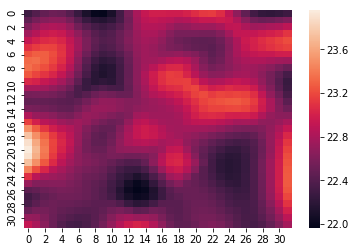

In [101]:


points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:32j, 0:7:32j]
pixels = mean1
bicubic = griddata(points, pixels, (grid_x, grid_y), method='cubic')
sns.heatmap(bicubic, linewidths=0.0)

In [107]:
# pd.rolling_window(pd.DataFrame(sample[3:, 1:3]), window=3).count()
frames = []
# for row in df.iloc[(time_10to11_fri):(time_10to11_fri+(chunk_hour1)),1:].iterrows():
#     frames.append(np.array(row[1:]).reshape(8,8).astype('float'))
#     print(pd.Series(row[1:]).values.reshape(8,8))
df_chunk = df.iloc[(time_10to11_fri):(time_10to11_fri+(chunk_hour1)),1:]
# df_chunk.iloc[:,0]
for i in range(64):
    frames.append(df_chunk.iloc[:,i].mean())

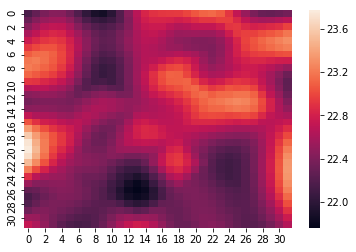

In [108]:
points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:32j, 0:7:32j]
pixels = frames
bicubic = griddata(points, pixels, (grid_x, grid_y), method='cubic')
sns.heatmap(bicubic, linewidths=0.0)

In [ ]:
fig = plt.figure()
data = frames[0]
# sns.heatmap(data, linewidths=0.5, annot=True)
def init():
    h_init = sns.heatmap(np.zeros((8, 8)), linewidths=0.5, annot=True, vmin=22, vmax=27)
    type(h_init)
    return [h_init]
def animate(i):
    plt.clf()
    data = frames[i]
    h_curr = sns.heatmap(data, linewidths=0.5, annot=True, vmin=22, vmax=27)
    return h_curr
#init()
animate(599)

In [ ]:
start_time = timeit.default_timer()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=600, interval=60, repeat=True,blit=True)
elapsed = timeit.default_timer() - start_time
print(elapsed)

In [ ]:
start_time = timeit.default_timer()
anim.save('mymovie.mp4',fps=10)
elapsed = timeit.default_timer() - start_time
print(elapsed)
plt.close(fig)

In [ ]:
start_time = timeit.default_timer()
HTML(anim.to_html5_video())
elapsed = timeit.default_timer() - start_time
print(elapsed)

# TRAINING DATA

In [22]:
df_train = pd.read_csv("training-Thermal.csv")

In [23]:
df_train.columns= ["time"]+["P"+str(x) for x in tnrange(64)]
df_train.set_index('time')
def convert_time(t):
    try:
        dt = parser.parse(t)
    except:
        pass
    
#df_train["time"].apply(convert_time)
df_train

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/local/lib/python2.7/dist-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python2.7/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



,time,P0,P1,P2,P3,P4,P5,P6,P7,P8,...,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63
0,Mon Nov 27 23:14:15 2017,23.00,22.75,22.75,23.00,23.25,23.25,22.50,22.75,23.50,...,22.00,23.25,23.25,21.50,22.00,22.00,21.00,22.25,22.00,21.25
1,Mon Nov 27 23:14:15 2017,22.50,21.75,22.00,23.25,23.00,23.00,22.00,22.25,23.00,...,22.25,22.50,20.50,22.25,22.00,23.00,22.00,22.00,22.50,21.75
2,Mon Nov 27 23:14:15 2017,21.75,23.25,22.00,23.25,22.75,23.25,22.50,22.50,22.00,...,23.25,22.75,23.50,22.50,23.25,22.75,22.50,21.75,22.50,22.75
3,Mon Nov 27 23:14:15 2017,22.50,23.00,22.50,22.75,23.00,23.50,23.00,21.75,22.25,...,21.25,23.00,21.25,22.25,21.75,22.50,22.75,20.75,22.50,22.00
4,Mon Nov 27 23:14:15 2017,22.50,22.75,22.25,23.75,23.00,22.75,22.25,23.00,23.50,...,21.25,22.50,22.50,21.75,22.00,23.25,22.00,22.00,21.50,22.00
5,Mon Nov 27 23:14:15 2017,23.50,23.75,22.00,25.25,22.25,23.25,23.25,22.25,22.50,...,22.75,23.50,22.50,21.75,22.00,21.75,21.25,21.75,21.25,22.75
6,Mon Nov 27 23:14:15 2017,23.75,23.50,22.25,24.00,23.00,23.50,22.75,23.25,23.00,...,22.50,23.50,23.75,22.50,22.50,22.50,22.75,22.25,22.00,21.50
7,Mon Nov 27 23:14:16 2017,23.25,23.25,22.25,23.50,23.00,23.50,21.00,21.50,23.25,...,21.75,23.00,22.25,21.25,22.00,23.25,21.50,22.25,20.75,21.50
8,Mon Nov 27 23:14:16 2017,21.75,22.75,22.75,23.00,22.75,22.75,21.50,21.75,23.25,...,21.75,23.50,21.00,21.50,21.75,21.75,21.00,22.50,22.75,21.00
9,Mon Nov 27 23:14:16 2017,23.25,24.00,23.25,24.50,23.25,22.75,22.75,21.50,23.00,...,21.75,22.25,22.50,21.50,22.75,23.00,22.75,22.25,22.50,21.75


In [24]:
frames1 = []
for row in df_train.iloc[:,1:].iterrows():
    frames1.append(np.flip((np.array(row[1:]).reshape(8,8).astype('float').T),0))
    
# df_chunk = df.iloc[(time_10to11_fri):(time_10to11_fri+(chunk_hour1)),1:]
# df_chunk.iloc[:,0]

In [25]:
np.array([0,1,2,3]).reshape(2,2)

array([[0, 1],
       [2, 3]])

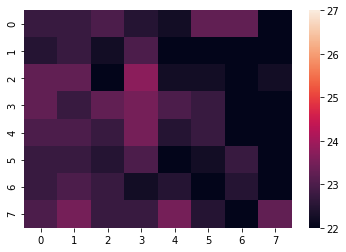

In [26]:
sns.heatmap(frames1[0], vmin=22, vmax=27)

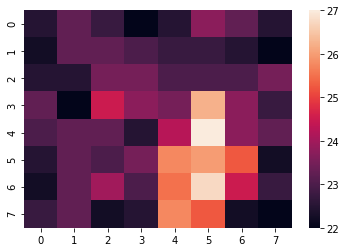

In [27]:
sns.heatmap(frames1[40], vmin=22, vmax=27)

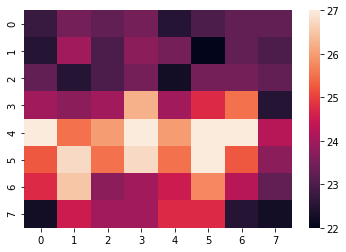

In [28]:
sns.heatmap(frames1[100], vmin=22, vmax=27)

# Playing with Kernels and Convolutions

In [29]:
from scipy.interpolate import griddata
from scipy.ndimage import convolve
import math

#kernels taken from here: https://docs.gimp.org/en/plug-in-convmatrix.html

kernel = [[0,1,0],[1,-10,1],[0,1,0]] # edge detect
kernel2 = [[0,0,0],[-1,1,0],[0,0,0]] #edge enhance
kernel3 = [[0,-1,0],[-1,10,-1],[0,-1,0]] #sharpen
edge = convolve(frames[40], kernel3)

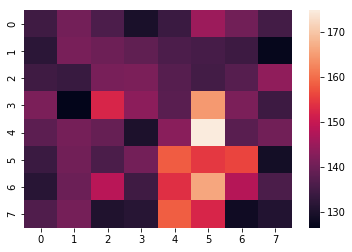

In [30]:
sns.heatmap(edge)#, vmin=-170, vmax=-150)

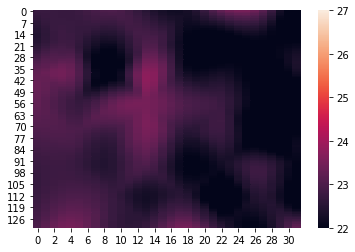

In [31]:
points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:132j, 0:7:32j]
pixels1 = frames1[0].flatten()
bicubic = griddata(points, pixels1, (grid_x, grid_y), method='cubic')
sns.heatmap(bicubic, linewidths=0.0, vmin=22, vmax=27)

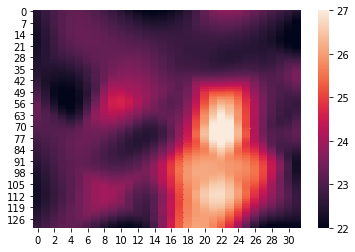

In [32]:
pixels1 = frames1[40].flatten()
bicubic = griddata(points, pixels1, (grid_x, grid_y), method='cubic')
sns.heatmap(bicubic, linewidths=0.0, vmin=22, vmax=27)

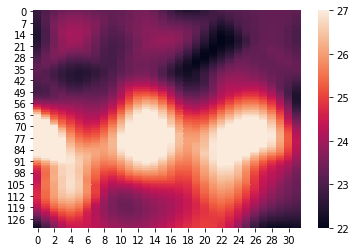

In [33]:
pixels1 = frames1[100].flatten()
bicubic = griddata(points, pixels1, (grid_x, grid_y), method='cubic')
sns.heatmap(bicubic, linewidths=0.0, vmin=22, vmax=27)

# Create Videos
## (Skip)

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.core.display import HTML
%matplotlib inline
import timeit

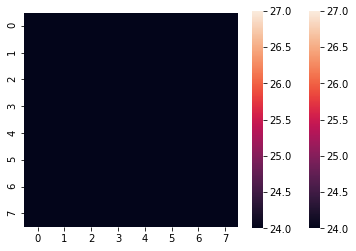

In [38]:
# Low res animation
fig = plt.figure()


def init():
    sns.heatmap(np.zeros((8, 8)),vmin=24,vmax=27)

def animate(i):
    plt.clf()
    data = frames1[i]
    sns.heatmap(data, vmin=24,vmax=27,square=True)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames1=len(frames1), repeat = True)
HTML(anim.to_html5_video())

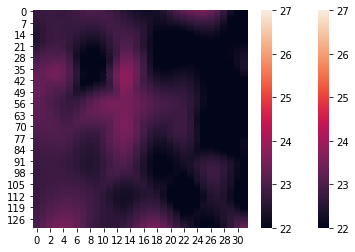

In [257]:
points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:132j, 0:7:32j]
pixels1 = frames1[0].flatten()

fig = plt.figure()


def init():
    bicubic = griddata(points, frames1[0].flatten(), (grid_x, grid_y), method='cubic')
    sns.heatmap(bicubic, linewidths=0.0, vmin=22, vmax=27)

def animate(i):
    plt.clf()
    bicubic = griddata(points, frames[i].flatten(), (grid_x, grid_y), method='cubic')
    sns.heatmap(bicubic, linewidths=0.0, vmin=24, vmax=27)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(frames), repeat = True)
HTML(anim.to_html5_video())

# Training Data Algorithm

In [41]:
n = 8
mask = bitmask_2d_square(3,-1,8,3,5)
array = np.zeros((n, n))
array[mask] = 1
# tester = np.multiply(frames[40],array)
# tester = tester.sum()/9
array

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [42]:
# frames is a list of 2D arrays
# t is the instantaneous time point
# frames[t][0][0] is the top left pixel
# frames[t][7][7] is the bottom right pixel
# 31.75 is the maximum, 20.5 is the minimum temp
#
# u1   u2   u3
#    |    |    |
#    |    |    |
#    |    |    |

#----------VARIABLES----------
u3 = 5 #centre of rectangle right
u2 = 2 #centre of rectangle middle
u1 = -1 #centre of rectangle left
ux = [u1,u2,u3]
kw = 3 #Kernel width
kernel_area = 15 #Area of kernel = 15 pixels 
threshold1 = 24 #temperature average considered to be a person
n = 8 #
temps_thresh1 = []
temps1 = []
# for all frames
for t in tnrange(len(frames1)-1):
    temp_thresh = [0,0,0]
    temp = [0,0,0]
    for centrex in range(3):
        mask = bitmask_2d_square(kw,ux[centrex],n,3,5)
        array = np.zeros((n, n))
        # create bitmask
        array[mask] = 1
        if centrex == 0:
            mean_temp = (np.multiply(frames[t],array).sum())/10
        else:
            mean_temp = (np.multiply(frames[t],array).sum())/kernel_area
        temp[centrex] = mean_temp
        if mean_temp > threshold:
            temp_thresh[centrex] = 1
        else:
            temp_thresh[centrex] = 0
            
    temps_thresh.append(temp_thresh)
    temps.append(temp)

In [43]:
df_tempMeans = pd.DataFrame(temps)
df_tempMeans_thresh = pd.DataFrame(temps_thresh)


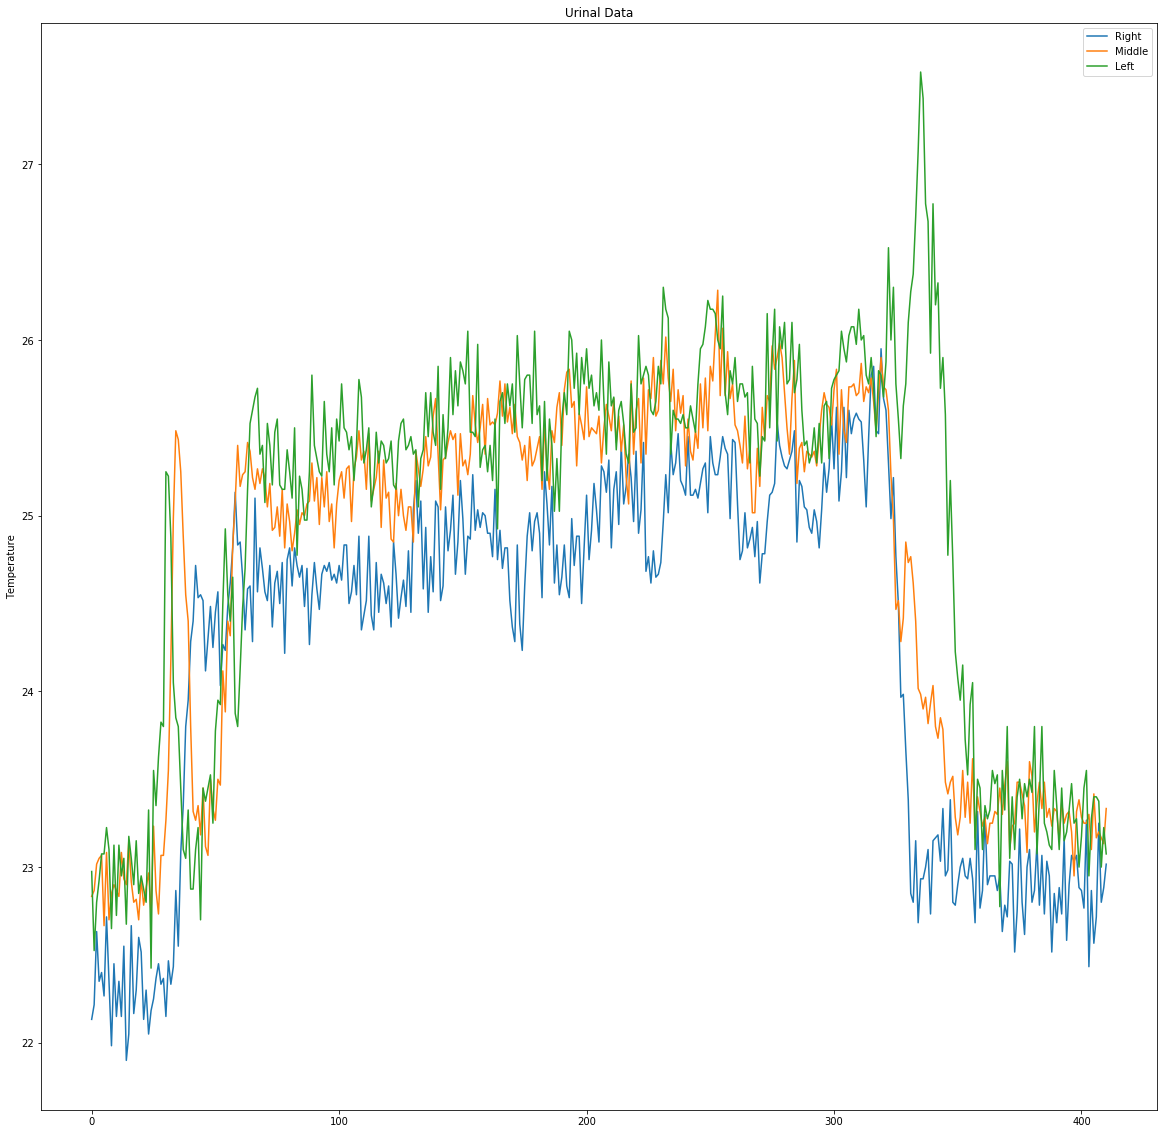

In [65]:
import matplotlib.pyplot as plt
plt.figure()

plt.plot(df_tempMeans.iloc[:][2], label="Right")
plt.ylabel('Temperature')

plt.plot(df_tempMeans.iloc[:][1], label="Middle")
plt.title("Middle")
plt.plot(df_tempMeans.iloc[:][0], label="Left")
plt.title("Left")
plt.legend()


plt.title("Urinal Data")
plt.show()

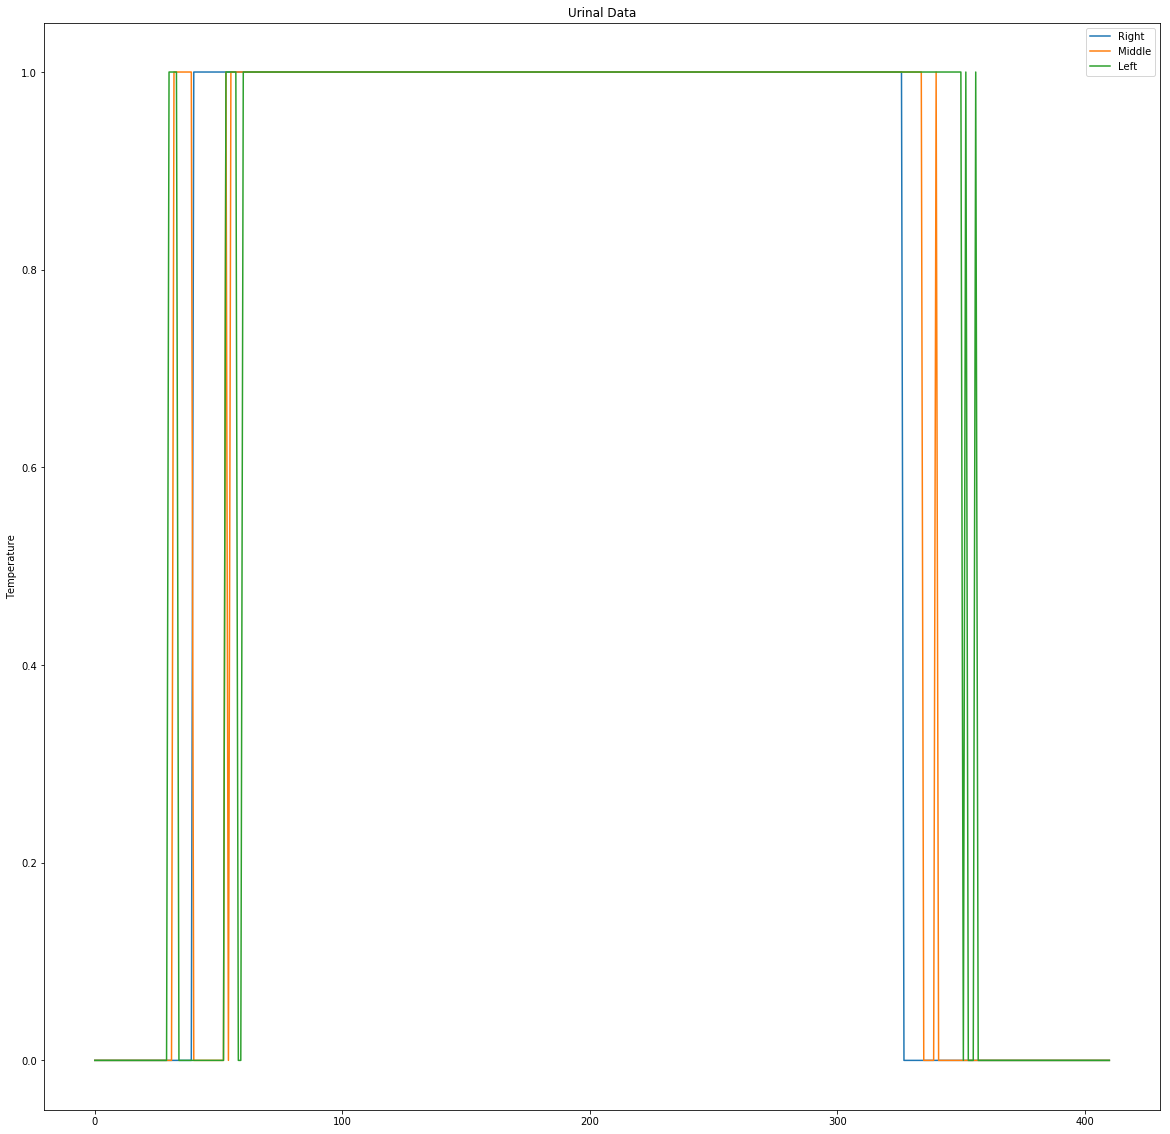

In [66]:
import matplotlib.pyplot as plt
plt.figure()

plt.plot(df_tempMeans_thresh.iloc[:][2], label="Right")
plt.ylabel('Temperature')

plt.plot(df_tempMeans_thresh.iloc[:][1], label="Middle")
plt.title("Middle")
plt.plot(df_tempMeans_thresh.iloc[:][0], label="Left")
plt.title("Left")
plt.legend()


plt.title("Urinal Data")
plt.show()  

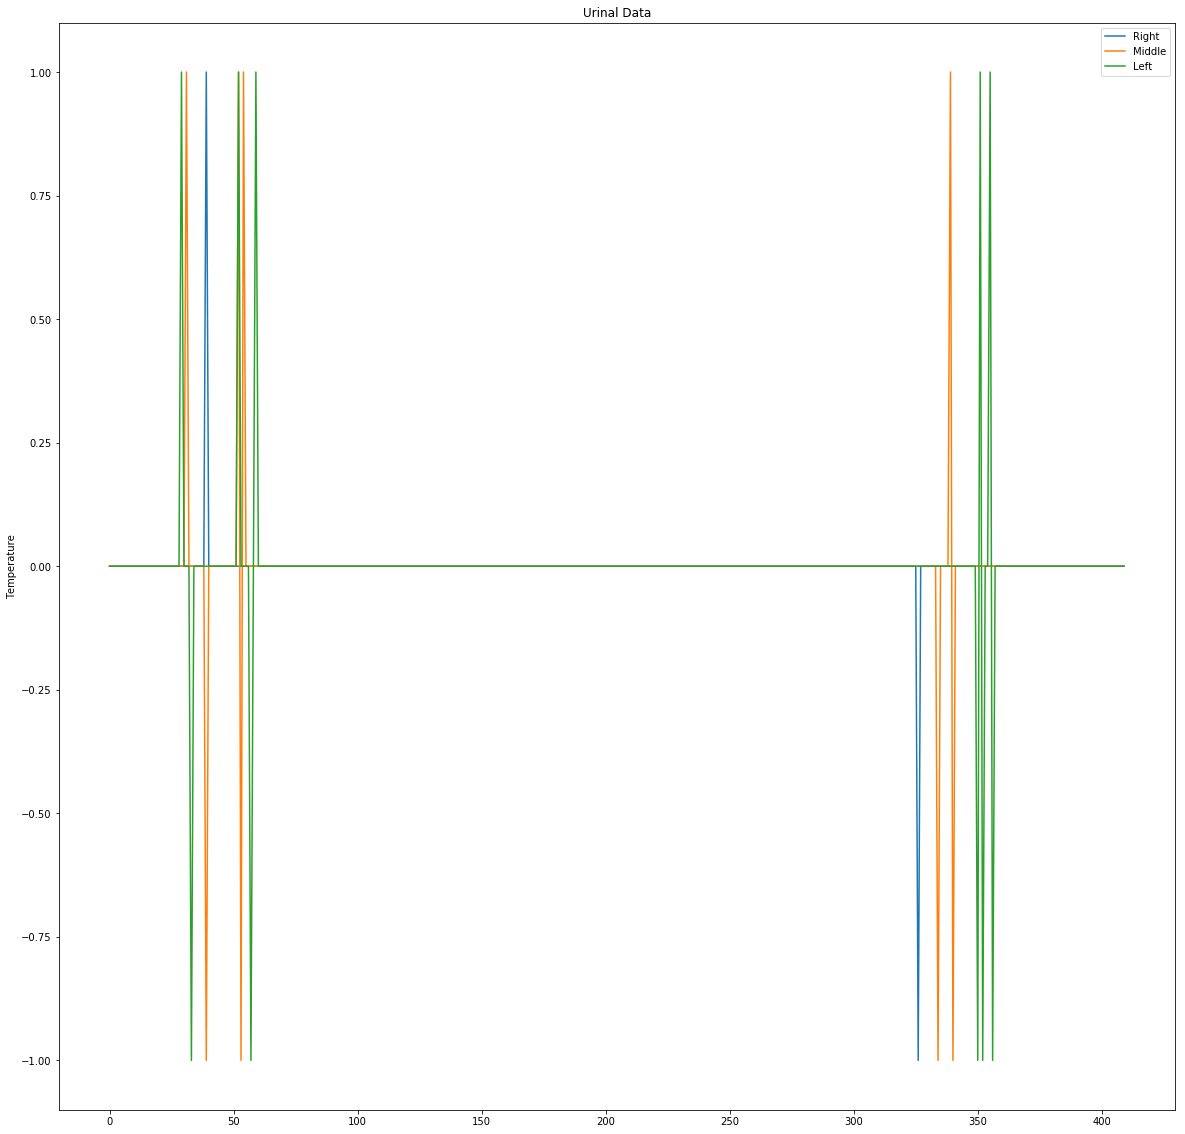

In [67]:
plt.figure()

plt.plot(np.diff(df_tempMeans_thresh.iloc[:][2]), label="Right")
plt.ylabel('Temperature')

plt.plot(np.diff(df_tempMeans_thresh.iloc[:][1]), label="Middle")
plt.title("Middle")
plt.plot(np.diff(df_tempMeans_thresh.iloc[:][0]), label="Left")
plt.title("Left")
plt.legend()


plt.title("Urinal Data")
plt.show()

In [47]:
df_tempMeans_thresh.iloc[20:70][:]

,0,1,2
20,0,0,0
21,0,0,0
22,0,0,0
23,0,0,0
24,0,0,0
25,0,0,0
26,0,0,0
27,0,0,0
28,0,0,0
29,0,0,0


In [134]:
# Check all that all who entered also left
assert df_temp_diff.iloc[:,0].sum() == False
assert df_temp_diff.iloc[:,1].sum() == False
assert df_temp_diff.iloc[:,2].sum() == False

# Variable initialisation
stay_threshold = 50 #5 seconds
walk_in = 1
walk_out = -1
stay = 0

left   = 0
middle = 1
right  = 2

#keep track of last non-stay state and the index/time respectively
left_state_out   = 0
middle_state_out = 0
right_state_out  = 0

left_state_in   = 0
middle_state_in = 0
right_state_in  = 0


states_left = []
states_middle = []
states_right = []
# a state-space circular buffer
# call .append() to add to buffer
# all([ v == 0 for v in left_state_buff ])  (True if all values in buffer are 0) 
# import collections
# left_state_buff = collections.deque(maxlen=stay_threshold)
# middle_state_buff = collections.deque(maxlen=stay_threshold)
# right_state_buff = collections.deque(maxlen=stay_threshold)

for t in tnrange(len(df_temp_diff1)):
    
    #test left
    if df_temp_diff1.iloc[t,left] == stay:
        pass
    elif df_temp_diff1.iloc[t,left] == walk_out:
        left_state_out = t
        states_left.append((left_state_in,left_state_out))
   
    elif df_temp_diff1.iloc[t,left] == walk_in:
        left_state_in = t
        
        
    
    #test middle
    if df_temp_diff1.iloc[t,middle] == stay:
        pass
    elif df_temp_diff1.iloc[t,middle] == walk_out:
        middle_state_out = t
        states_middle.append((middle_state_in,middle_state_out))
    elif df_temp_diff1.iloc[t,middle] == walk_in:
        middle_state_in = t
    
    #test right
    if df_temp_diff1.iloc[t,right] == stay:
        pass
    elif df_temp_diff1.iloc[t,right] == walk_out:
        right_state_out = t
        states_right.append((right_state_in,right_state_out))
    elif df_temp_diff1.iloc[t,right] == walk_in:
        right_state_in = t

In [143]:
print(states_left,states_middle,states_right)
# states_left[0][1] - states_left[0][0]

([(29, 33), (52, 57), (59, 350), (351, 352), (355, 356)], [(31, 39), (52, 53), (54, 334), (339, 340)], [(39, 326)])


In [52]:
#entry wise product (Hadamard product)

In [53]:
# from scipy import signal.savgol_filter
# y = savgol_filter(x, 5, 2)

In [104]:
left = []
middle = []
right = []
df_temp_diffA = []
# x.append([1, 0, 1])
left = np.diff(df_tempMeans_thresh.iloc[:][0])
middle = np.diff(df_tempMeans_thresh.iloc[:][1])
right = np.diff(df_tempMeans_thresh.iloc[:][2])
df_temp_diffA.append(left)
df_temp_diffA.append(middle)
df_temp_diffA.append(right)
df_temp_diff1 = pd.DataFrame(df_temp_diffA)
df_temp_diff1 = df_temp_diff1.T

In [121]:
assert df_temp_diff1.iloc[:,0].sum() == False


In [80]:
for i in range(len(x)):
    print(x[i])

[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 0 0]
[0 0 0]
[0 1 0]
[0 0 0]
[-1  0  0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[ 0 -1  1]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 1 0]
[ 0 -1  0]
[0 1 0]
[0 0 0]
[0 0 0]
[-1  0  0]
[0 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0

In [43]:
df_temp_diff_test = df_tempMeans_thresh.diff()[1:]


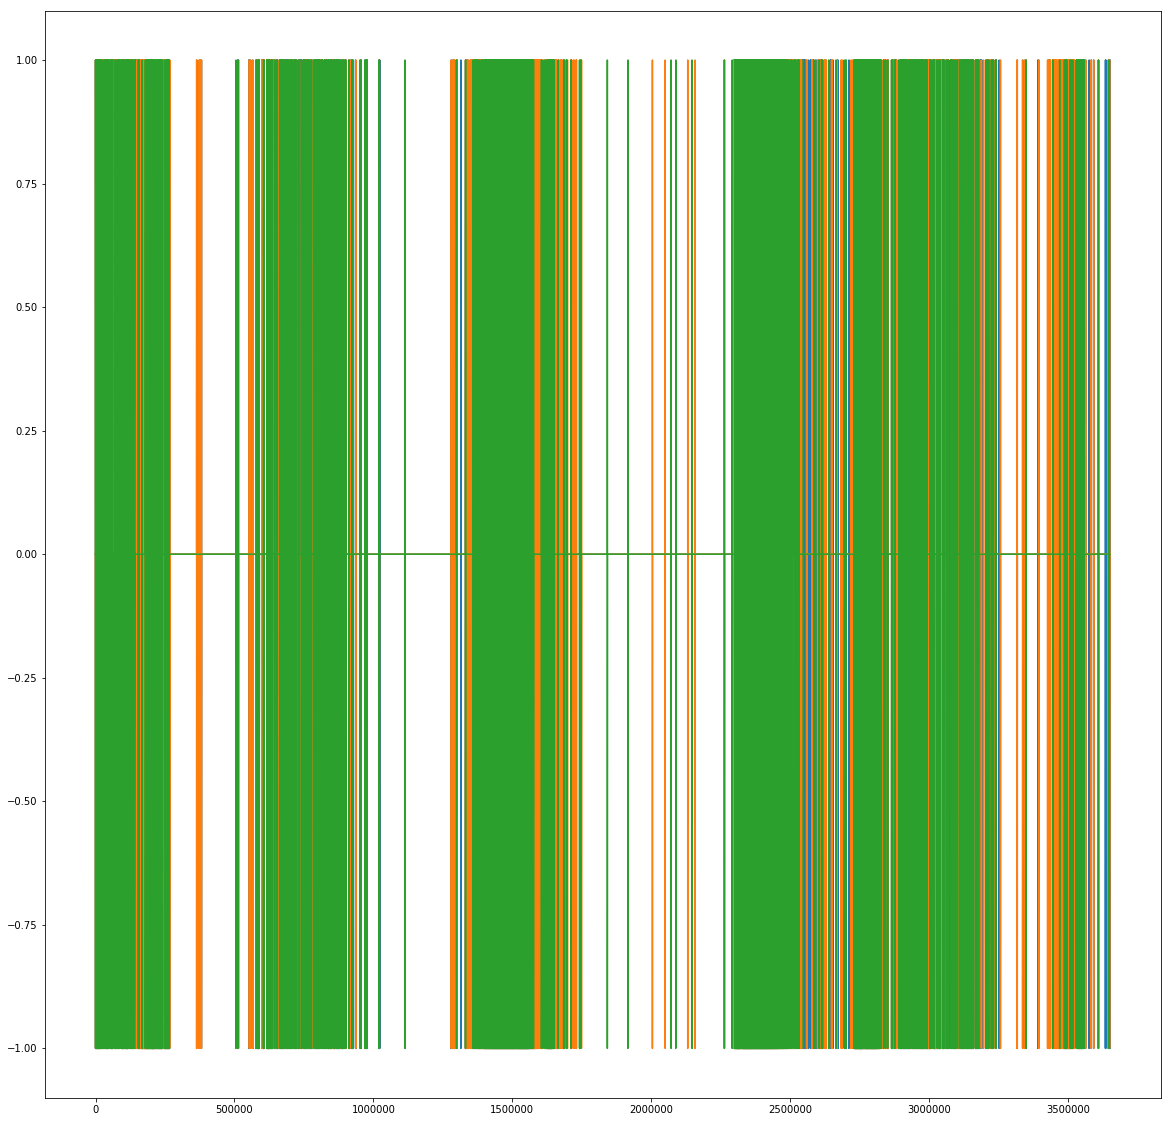

In [44]:
plt.plot(df_temp_diff_test.iloc[:][0])
plt.plot(df_temp_diff_test.iloc[:][1])
plt.plot(df_temp_diff_test.iloc[:][2])
plt.show()

ZeroDivisionError: integer division or modulo by zero